# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: man

Last Name: pan

Student ID: 914656278

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [106]:
from urllib.parse import urlparse
import pandas as pd
import json
import re
import numpy as np
from matplotlib import pyplot as plt
import requests
import requests_cache
requests_cache.install_cache("cache")
from pandas.tools.plotting import scatter_matrix

In [107]:
key='RLRLUw2CZgyOWXYyYMreCKUWoyphupeG27okN9ON'

In [108]:
def ndb_search(key, term):
    url = 'https://api.nal.usda.gov/ndb/search'
    r = requests.get(url, params = (('api_key', key),('q', term),('format', 'json')))
    if 'list' in r.json():
        l = r.json()['list']['item']
        if len(l) == 0:
            return []  # for 0 items, return an empty list
    else: 
        return []
    return l

In [109]:
test1 = ndb_search(key, 'quail eggs')
test1

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [110]:
fresh=pd.read_csv("C:/Users/manpa/Downloads/fresh.csv")
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit


In [111]:
#add "raw" to list of food to search
food = fresh['food']
food = food.str.replace("_",' ')
food = food.str.replace("kiwi", "kiwifruit")
food = food + ' raw'
for i in range(0,len(food)):
    foodlist = ndb_search(key, food[i])

In [112]:
def ndbnum():
    pm1 = []
    ndbnum = []
    listname = []
    name = []
    for i in range(0,len(food)):
        foodlist = ndb_search(key, food[i])
        if foodlist != []:
            for j in range(0, len(foodlist)):
            #find the one that are not in the Branded Food Products group and get the name
                if foodlist[j]['group']!= "Branded Food Products Database":
                    if foodlist[j]['name'].endswith('raw') and foodlist[j]['name'].find('juice') == -1:
                        listname = foodlist[j]['name']
                        name.append(listname)
                        #get the ndb number
                        num = foodlist[j]['ndbno']
                        pm1.append(num)
                    
                    #if "raw" is in the middle
                    elif foodlist[j]['name'].find(', raw') > -1:
                        if foodlist[j]['name'].find('juice') == -1:
                            listname = foodlist[j]['name']
                            name.append(listname)
                            num = foodlist[j]['ndbno']
                            pm1.append(num)
            if len(pm1) == 0:
                ndbnum.append('')
            else:
                ndbnum.append(pm1[0])
            pm1= []
        else:
            ndbnum.append('')
    return ndbnum

In [113]:
ndbnum=ndbnum()
fresh["NDB number"] = pd.DataFrame(ndbnum)
fresh[["food","NDB number"]]

,food,NDB number
0,watermelon,09326
1,cantaloupe,09181
2,tangerines,09218
3,strawberries,09316
4,plums,09279
5,oranges,09201
6,raspberries,09302
7,pomegranate,09286
8,pineapple,09266
9,apricots,09021


Firstly, my strategy is to get each food in the fresh.csv file with the added word "raw". I have to replace "_" to " ", "kiwi" to "kiwifruit", so that I can get the name of each food successfully. 
Then, I find there are some different cases. There are some food that are not in the group "Branded Food Products Database", and some have the name ends with "raw" and those that are not juice, some have "raw" in the middle of the name. I should get the ndb numbers in those different cases. It leads to different coding for these differences.

__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [114]:
def ndb_report(key, ndbno):
    url = 'https://api.nal.usda.gov/ndb/V2/reports'
    r = requests.get(url, params =  (('api_key', key),('ndbno', ndbno),('type', 'b'),('format', 'json')))
    l = r.json()['foods'][0]['food']['nutrients']
    return l

In [115]:
test3 = ndb_report(key, '09279')
test3

[{'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '143.93'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '57.57'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '131.72'}],
  'name': 'Water',
  'nutrient_id': '255',
  'unit': 'g',
  'value': '87.23'},
 {'derivation': 'NC',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '76'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '30'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '69'}],
  'name': 'Energy',
  'nutrient_id': '208',
  'unit': 'kcal',
  'value': '46'},
 {'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g

In [116]:
pd3=pd.DataFrame(test3)
pd3

,derivation,group,measures,name,nutrient_id,unit,value
0,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Water,255,g,87.23
1,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Energy,208,kcal,46
2,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Protein,203,g,0.70
3,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Total lipid (fat),204,g,0.28
4,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Carbohydrate, by difference",205,g,11.42
5,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Fiber, total dietary",291,g,1.4
6,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Sugars, total",269,g,9.92
7,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Calcium, Ca",301,mg,6
8,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Iron, Fe",303,mg,0.17
9,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Magnesium, Mg",304,mg,7


__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [117]:
def get_nutrient(nutrient_type):
    nutrient= []
    nut = []
    pm2 = []
    for i in range(0, len(fresh['food'])):
        if len(fresh["NDB number"][i]) == 0:
            nut.append(np.nan)
        else:
            nutrient = ndb_report(key, fresh["NDB number"][i])
            for j in range(0, len(nutrient)):
                nutdata = nutrient[j]
                #extract the data where it matches the nutrient type in the dict "name"
                if (nutdata.get('name') == nutrient_type):
                    n = nutdata['value']
                    pm2.append(n)
            
            if len(pm2) == 0:
                nut.append(np.nan)
            else:
                #change it to float
                nut.append(float(n))
            pm2 = []  
    return nut

In [118]:
energy = get_nutrient('Energy')
fresh['calories'] = pd.DataFrame(energy)
carbo = get_nutrient("Carbohydrate, by difference")
fresh['Carbonhydrate'] = pd.DataFrame(carbo)
protein = get_nutrient("Protein")
fresh['protein'] = pd.DataFrame(protein)
fiber = get_nutrient("Fiber, total dietary")
fresh['fiber'] = pd.DataFrame(fiber)
vitamin_c = get_nutrient("Vitamin C, total ascorbic acid")
fresh['vitamin_c'] = pd.DataFrame(vitamin_c)
sugar = get_nutrient("Sugars, total")
fresh['sugar'] = pd.DataFrame(sugar)

In [119]:
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB number,calories,Carbonhydrate,protein,fiber,vitamin_c,sugar
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,30.0,7.55,0.61,0.4,8.1,6.20
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,34.0,8.16,0.84,0.9,36.7,7.86
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,53.0,13.34,0.81,1.8,26.7,10.58
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,32.0,7.68,0.67,2.0,58.8,4.89
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,46.0,11.42,0.70,1.4,9.5,9.92


C:\Users\manpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


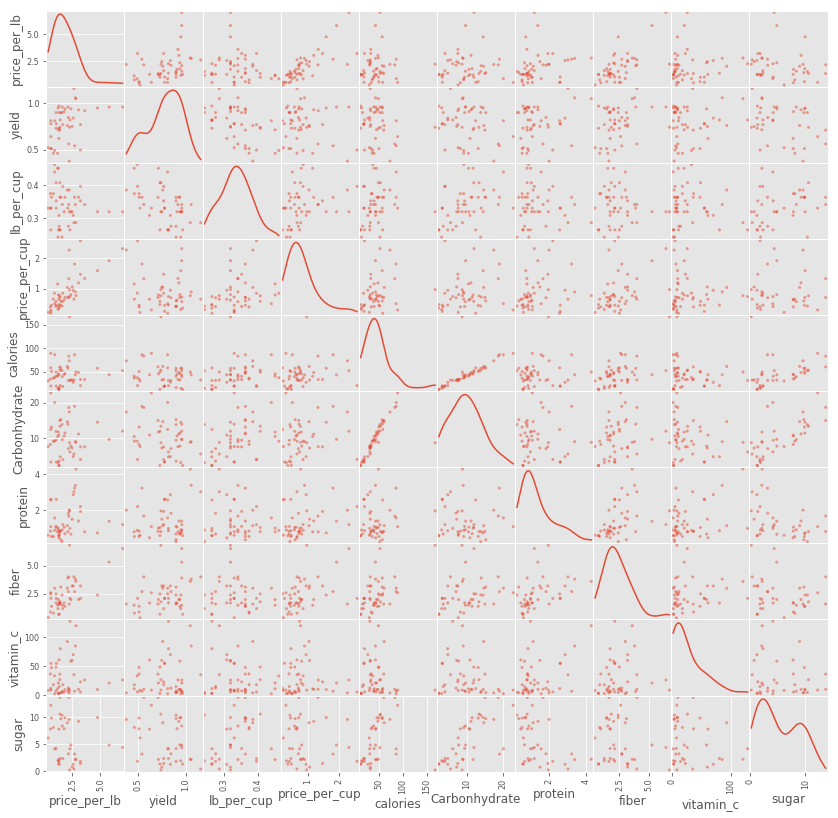

In [120]:
scatter_matrix(fresh,figsize=(14,14),diagonal='kde')
plt.show()

The scatter plot matrix shows that there maybe some meaningful associations between calories and carbonhydrate, 
calories and suger, calories and fiber, calories and protein, and there seems to have not much relationship between Vitamin C and other variables.

In [121]:
fresh2=pd.DataFrame()
fresh2['food'] = fresh['food']
fresh2['price/yield'] = fresh['price_per_lb']/fresh['yield']
fresh2['precal'] = fresh.ix[:,8].astype('float')/fresh2['price/yield']
fresh2['prepro'] = fresh.ix[:,10].astype('float')/fresh2['price/yield']
fresh2['precarb'] = fresh.ix[:,9].astype('float')/fresh2['price/yield']
fresh2['prefiber'] = fresh.ix[:,11].astype('float')/fresh2['price/yield']
fresh2['prevc'] = fresh.ix[:,12].astype('float')/fresh2['price/yield']
fresh2['presuger'] = fresh.ix[:,13].astype('float')/fresh2['price/yield']

C:\Users\manpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [122]:
fresh2.dropna().head()

,food,price/yield,precal,prepro,precarb,prefiber,prevc,presuger
0,watermelon,0.641177,46.788953,0.951375,11.775220,0.623853,12.633017,9.669717
1,cantaloupe,1.050733,32.358366,0.799442,7.766008,0.856545,34.928001,7.480493
2,tangerines,1.862111,28.462326,0.434990,7.163914,0.966645,14.338568,5.681725
3,strawberries,2.509371,12.752201,0.266999,3.060528,0.797013,23.432169,1.948696
4,plums,1.944060,23.661826,0.360071,5.874306,0.720143,4.886682,5.102724


In [123]:
def plot(fresh2):
    order = range(2,8)
    for i in order:
        N = len(fresh2['food'])
        plt.figure(figsize=(15, 6))
        plt.bar(left = np.arange(N),height = fresh2.ix[:,i])
        plt.xticks(np.arange(N),fresh2['food'], rotation='vertical')
        plt.xlabel("food")
        plt.ylabel(fresh2.columns[i])
        plt.show()
    return

C:\Users\manpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\manpa\Anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


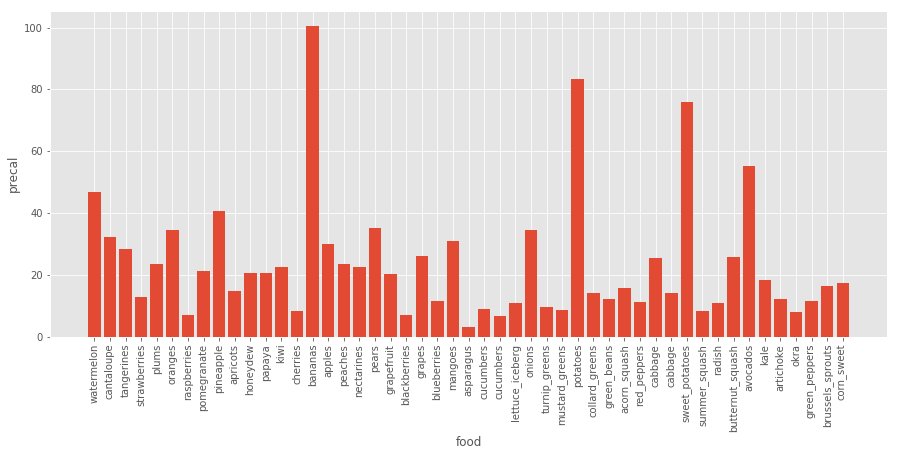

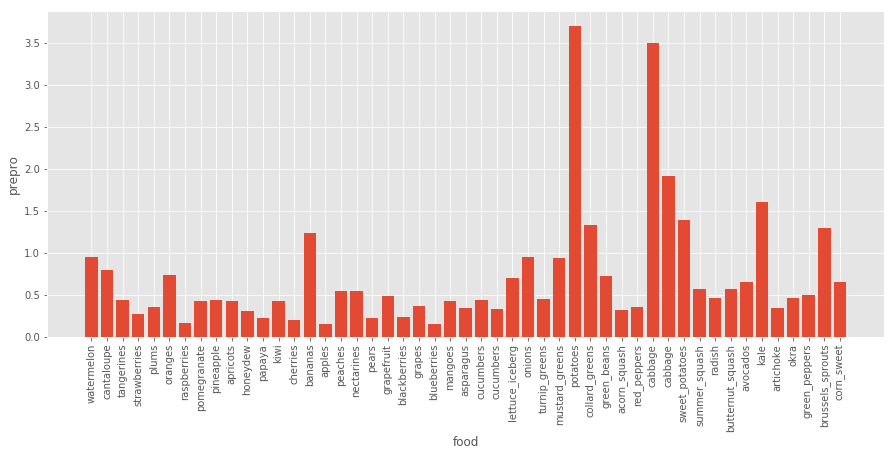

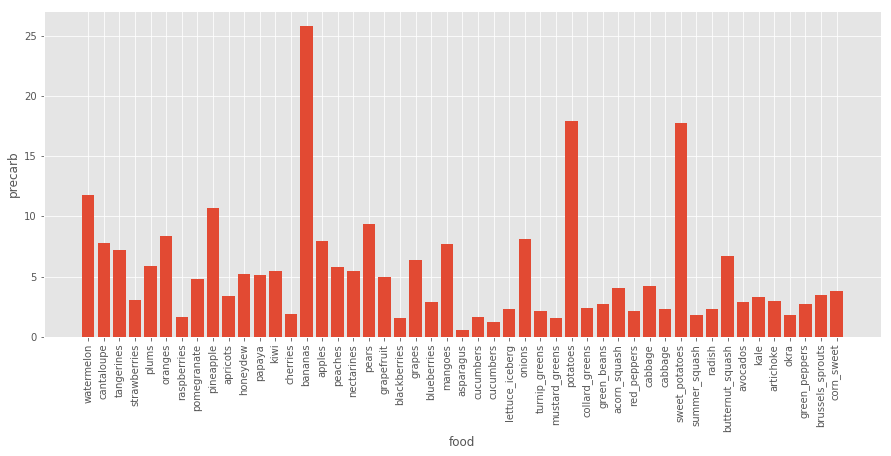

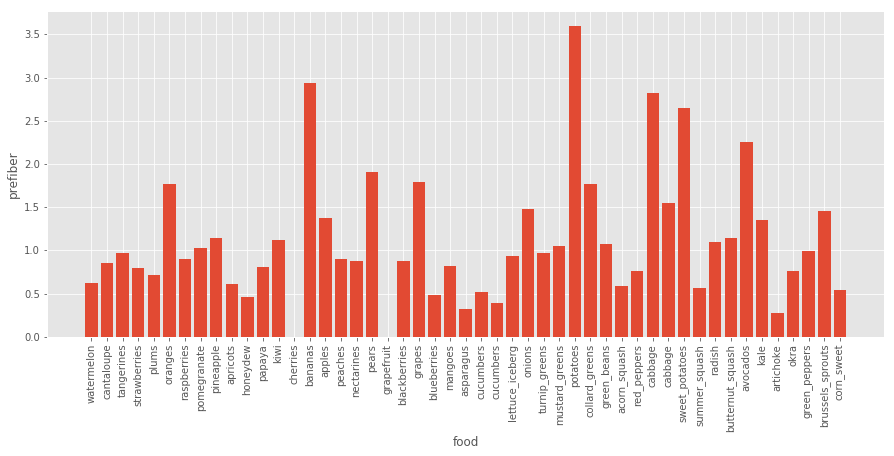

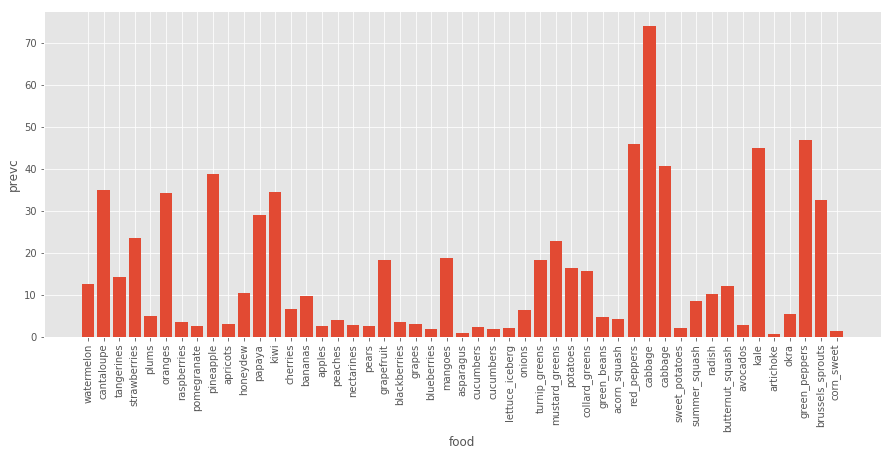

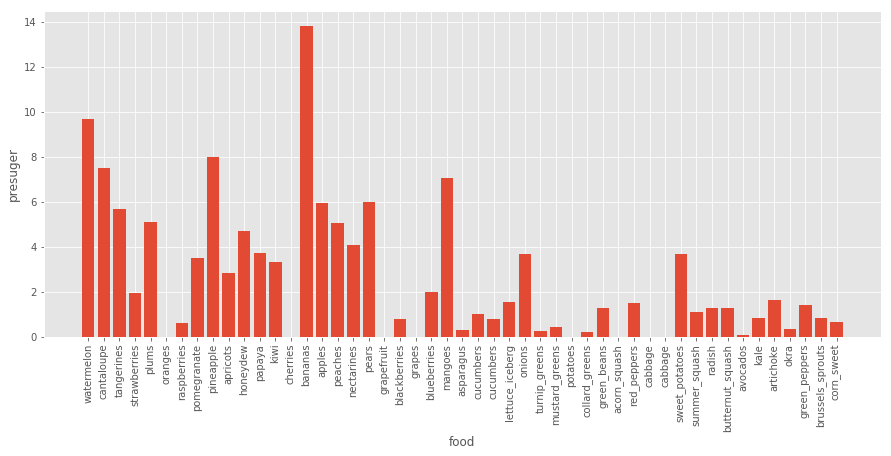

In [124]:
plot(fresh2)

According to different indexs, I plot barplot to measure the combination of price, yield, and nutrition. And I use the ratio of (yield*(items)/price) is the measure of combination of price, yield and nutrition. From the plot, we can see:
As for calories, bananas provide the best combination of price, yield and nutrition; 
As for protein, potatoes provide the best combination of price, yield and nutrition;
As for Carbonhydrate, bananas provide the best combination of price, yield and nutrition; 
As for fiber, potatoes provide the best combination of price, yield and nutrition;
As for vitamin_c, cabbage provide the best combination of price, yield and nutrition;
As for suger, bananas provide the best combination of price, yield and nutrition.